# NAIVE BAYES

Naive Bayes adalah algoritma yang relatif mudah dalam menentukan klasifikasi. Algoritmanya menggunakan probabilitas matematika yang diobservasi pada tiap-tiap fitur, dan kemudian dianalisis dengan persamaan Teorema Bayes. Jadi, Naive Bayes tidak memerlukan training model seperti Classifier lainnya, karena Naive Bayes murni hanya perhitungan. Hasil klasifikasi akan ditentukan berdasarkan peluang tertinggi

Misal kita mempunyai dataset yang berisi tentang kemungkinan kita akan bermain golf terhadap cuaca.

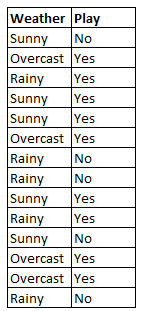

 Kemudian kita convert dataset tersebut berdasarkan frekuensi.

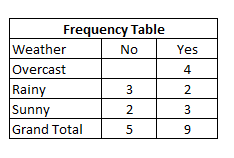

Formula Posterior Probability 

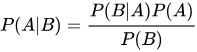

<br> $P(A)$ = Prior Probability, peluang hipotesis yang kita percaya akurat untuk dimodelkan
<br> $P(B|A)$ = Likelihood, besaran untuk menentukan seberapa bagus kualitas model dalam memprediksi data
<br> $P(B)$ = normalization, konstanta untuk menormalisasi sehingga nilai P(A|B) berkisar antara 0 sampai 1.
<br> $P(A|B)$ = Posterior Probability, menunjukan seberapa besar probabilitas hipotesis kita berdasarkan bukti dari data yang telah disediakan


Berikut adalah Likelihood table, yaitu $P(B|A)$

##### 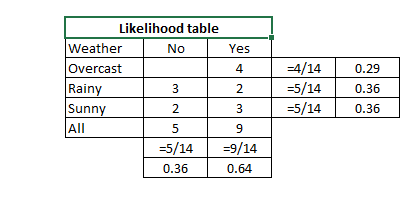

Contoh soal:
Apakah anak-anak lebih suka bermain jika cuaca cerah(sunny)?

$P(Yes | Sunny) = P( Sunny | Yes) * P(Yes) / P (Sunny)$<br>
$P(Yes | Sunny) = 3/9 * 9/14 / 5/14$<br>
$P(Yes | Sunny) = 0.60$<br>

dalam hasil diatas, peluang tersebut adalah 0.6, yang artinya anak-anak memang lebih suka bermain jika cuaca cerah.

Dalam modelling, Classifier Naive Bayes akan memprediksi input-input berdasarkan data yang telah disediakan, dan hasil klasifikasinya akan ditentukan dengan peluang yang terbesar.

Kelebihan 
1. sangat cepat dan mudah dalam memprediksi kategori dalam dataset
2. performansi sangat bagus jika fitur-fitur mempunyai sifat categorical
3. berfungsi baik pada data yang minimalis

Kekurangan 
1. Zero frequency, yang terjadi jika ada label pada test data yang tidak diobservasi pada training data
2. kualitas masih tertinggal dibanding metode-metode klasifikasi yang lain
3. Independence Assumption, yang artinya Naive Bayes berasumsi bahwa satu fitur terhadap fitur yang lainnya tidak      mempunyai korelasi, atau bersifat independen


# CODING SECTION
 
# Use Case

Sebuah perusahaan mobil berinisial AVZ ingin mendongkrak penjualan mereka untuk tahun 2019. Sebagai Data Scientist, kita diberikan dataset laporan hasil iklan mobil yang berisi dengan fitur ID, umur, gaji, dan record pembelian. Diharapkan kita mampu memberikan insight untuk meningkatkan kemungkinan customer akan membeli mobil tersebut atau tidak.

In [11]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [12]:
# Importing dataset
df = pd.read_csv('data_iklan.csv')

In [13]:
df.head(10)

,ID,Gender,Umur,Gaji,Pembelian
0,15624510,Pria,19,9,0
1,15810944,Pria,35,10,0
2,15668575,Wanita,26,21,0
3,15603246,Wanita,27,28,0
4,15804002,Pria,19,38,0
5,15728773,Pria,27,29,0
6,15598044,Wanita,27,42,0
7,15694829,Wanita,32,75,1
8,15600575,Pria,25,16,0
9,15727311,Wanita,35,32,0


In [14]:
# memisahkan dataset ke training dan test data
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 7, 25]], dtype=int64)

In [18]:
accuracy_score(y_test, y_pred)

0.9

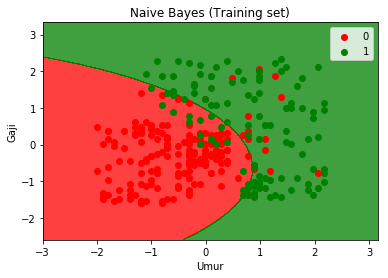

In [19]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()

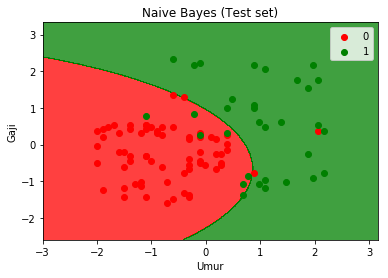

In [20]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()

# KESIMPULAN

Naive Bayes mempunyai performance sangat bagus jika fitur-fitur yang bersifat kategori. Dalam membuat model klasifikasi, Naive Bayes sering digunakan pada dataset yang kecil, atau hanya bertujuan untuk memberi gambaran untuk modelling dengan lain yang lain. Namun, Naive Bayes sangat powerful dalam NLP karena proses komputasi yang relatif singkat dan tidak kalah akurat dari teknik lain.